In [ ]:
chronic kidney disease
About Dataset
Context:
This dataset is originally from UCI Machine Learning Repository. The objective of the dataset is to diagnostically predict whether a patient is having chronic kidney disease or not, based on certain diagnostic measurements included in the dataset.

Content:
The datasets consists of several medical predictor variables and one target variable, Class. Predictor variables includes Blood Pressure(Bp), Albumin(Al), etc.

In [2]:
import pandas as pd

In [144]:
df=pd.read_csv("kidney_disease.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [145]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [146]:
#In this data set id is not mandatory so delete the id
df.drop(columns="id",axis=0,inplace=True)

In [147]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [148]:
#lets re name the column
df.columns=['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [149]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [86]:
#here some datas are in wrong datatype we have change that  first
text_columns=["white_blood_cell_count","packed_cell_volume","red_blood_cell_count"]
for i in text_columns:
    print(f"{i}and its dtypes : {df[i].dtypes}")




white_blood_cell_countand its dtypes : object
packed_cell_volumeand its dtypes : object
red_blood_cell_countand its dtypes : object


In [150]:
def change_dtypes(df,column):
    df[column]=pd.to_numeric(df[column],errors='coerce')
for column in text_columns:
    change_dtypes(df,column)
    print(f'{column} and {df[text_columns].dtypes}')

    

white_blood_cell_count and white_blood_cell_count    float64
packed_cell_volume         object
red_blood_cell_count       object
dtype: object
packed_cell_volume and white_blood_cell_count    float64
packed_cell_volume        float64
red_blood_cell_count       object
dtype: object
red_blood_cell_count and white_blood_cell_count    float64
packed_cell_volume        float64
red_blood_cell_count      float64
dtype: object


In [151]:
a=df[text_columns].dtypes
a

white_blood_cell_count    float64
packed_cell_volume        float64
red_blood_cell_count      float64
dtype: object

In [152]:
missing=df.isnull().sum()
missing[missing>0].sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
dtype: int64

In [153]:
def men_imputation(df,column):
    mean=df[column].mean()
    df[column].fillna(value=mean,inplace=True)
def mode_imputation(df,column):
    mode=df[column].mode()[0]
    df[column]=df[column].fillna(value=mode)

In [154]:
#first we need seprate the catagoricla and numerical coumls:
catagorical_col=[col for col in df if df[col].dtype=="object"]
numerical_col=[col for col in df if df[col].dtype!="object"]

In [155]:
for i in numerical_col:

    men_imputation(df,i)
    

C:\Users\kishore\AppData\Local\Temp\ipykernel_3252\2301501580.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value=mean,inplace=True)


In [156]:
for i in catagorical_col:
    mode_imputation(df,i)

In [157]:
missing=df.isnull().sum()
missing[missing>0].sort_values(ascending=False)

Series([], dtype: int64)

In [116]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [158]:
print(f"diabates{df.diabetes_mellitus.unique()}")
print(f"coronary_artery_disease: {df.coronary_artery_disease.unique()}")
print(f"peda_edema:{df.peda_edema.unique()}")
print(f"aanemia:{df.aanemia.unique()}")
print(f"class:{df['class'].unique()}")

diabates['yes' 'no' ' yes' '\tno' '\tyes']
coronary_artery_disease: ['no' 'yes' '\tno']
peda_edema:['no' 'yes']
aanemia:['no' 'yes']
class:['ckd' 'ckd\t' 'notckd']


In [176]:
df["diabetes_mellitus"]=df["diabetes_mellitus"].replace({" yes":1,"\tno":"no"})
df["coronary_artery_disease"]=df["coronary_artery_disease"].replace({"\tno":"no"})
df["class"]=df["class"].replace({"ckd\t":"ckd","notckd":"not ckd"})

C:\Users\kishore\AppData\Local\Temp\ipykernel_3252\3384888691.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["diabetes_mellitus"]=df["diabetes_mellitus"].replace({" yes":1,"\tno":"no"})


In [175]:
print(f"diabates{df.diabetes_mellitus.unique()}")
print(f"coronary_artery_disease: {df.coronary_artery_disease.unique()}")
print(f"peda_edema:{df.peda_edema.unique()}")
print(f"aanemia:{df.aanemia.unique()}")
print(f"class:{df['class'].unique()}")


diabates[1 0 ' yes']
coronary_artery_disease: [0 1]
peda_edema:[0 1]
aanemia:[0 1]
class:[1 0]


In [177]:
#change cat to num:
df["diabetes_mellitus"]=df["diabetes_mellitus"].replace({"yes":1,"no":0})
df["coronary_artery_disease"]=df["coronary_artery_disease"].replace({"yes":1,"no":0})
df["class"]=df["class"].replace({"ckd":1,"not ckd":0})
df["aanemia"]=df["aanemia"].replace({"yes":1,"no":0})
df["peda_edema"]=df["peda_edema"].replace({"yes":1,"no":0})
df["red_blood_cells"]=df["red_blood_cells"].replace({"normal":1,"abnormal":0})
df["pus_cell"]=df["pus_cell"].replace({"normal":1,"abnormal":0})
df["pus_cell_clumps"]=df["pus_cell_clumps"].replace({"present":1,"notpresent":0})
df["bacteria"]=df["bacteria"].replace({"present":1,"notpresent":0})
df["hypertension"]=df["hypertension"].replace({"yes":1,"no":0})
df["appetite"]=df["appetite"].replace({"good":1,"poor":0})


In [169]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


In [174]:
df.columns.unique()

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 640x480 with 0 Axes>

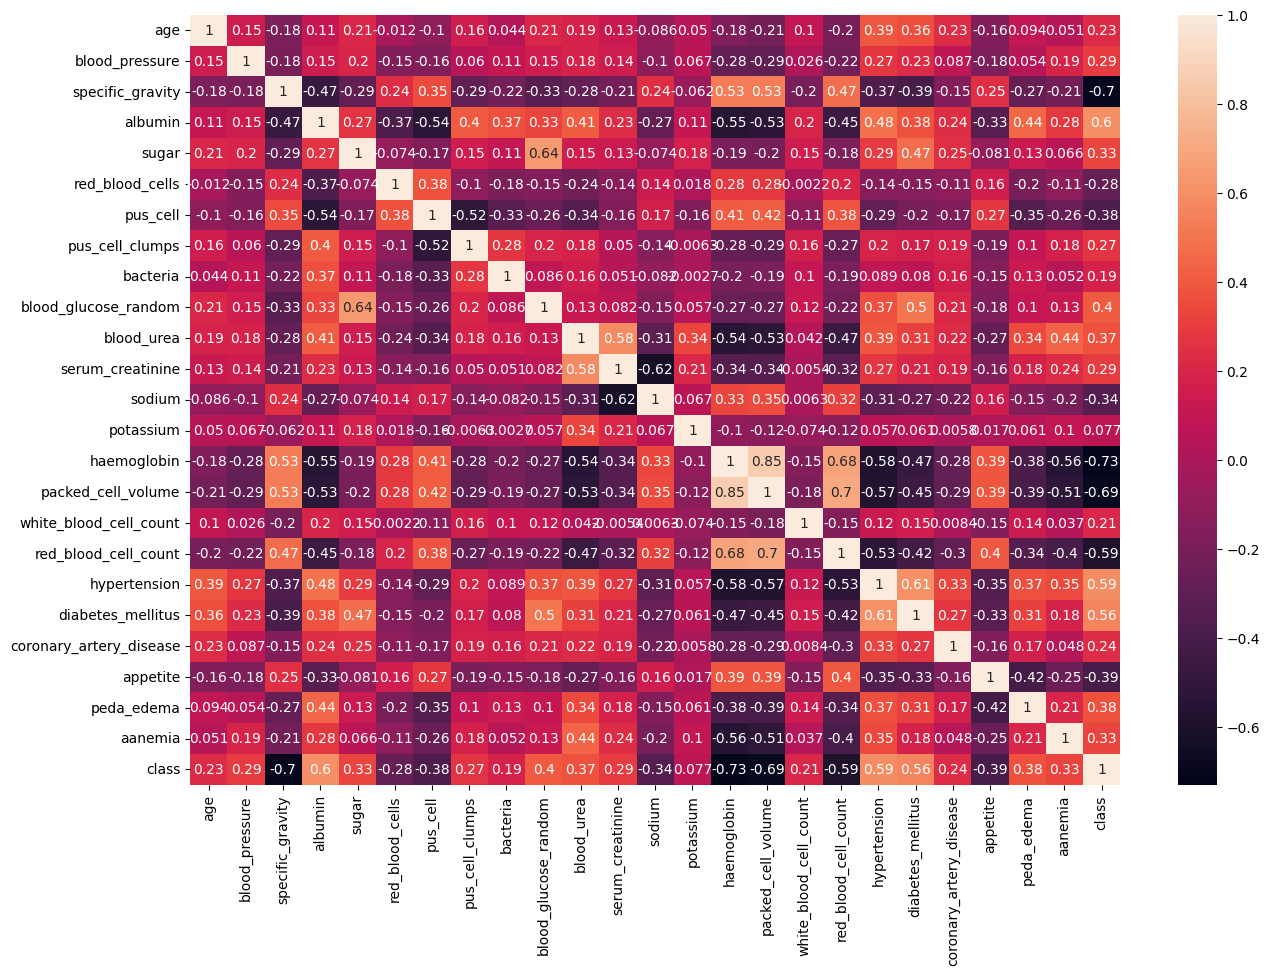

<Figure size 640x480 with 0 Axes>

In [179]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.figure()

In [181]:
target_coor=df.corr()["class"].abs().sort_values(ascending=False)
target_coor

class                      1.000000
haemoglobin                0.729628
specific_gravity           0.698957
packed_cell_volume         0.690060
albumin                    0.599238
red_blood_cell_count       0.590913
hypertension               0.590438
diabetes_mellitus          0.559060
blood_glucose_random       0.401374
appetite                   0.393341
pus_cell                   0.375154
peda_edema                 0.375154
blood_urea                 0.372033
sodium                     0.342288
sugar                      0.327812
aanemia                    0.325396
serum_creatinine           0.294079
blood_pressure             0.290600
red_blood_cells            0.282642
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.225405
white_blood_cell_count     0.205274
bacteria                   0.186871
potassium                  0.076921
Name: class, dtype: float64

In [ ]:
lets build the modle

In [182]:
from sklearn.model_selection import train_test_split

In [192]:
X=df.drop(columns="class",axis=1)
y=df["class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)
X_test.shape

(100, 24)

In [190]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [195]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [198]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

In [199]:
models=[]
models.append(("naive",GaussianNB()))
models.append(("neighbors",KNeighborsClassifier(n_neighbors=8)))
models.append(("RandomForestRegressor",RandomForestRegressor()))
models.append(("SVM",SVC(kernel="linear")))
              

In [201]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [207]:
for name,model in models:
    print(name,model)
    print()
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    print("accuracy_score:",accuracy_score(y_test,y_predict))
    print('\n')
    print("precision_score:",precision_score(y_test,y_predict))
    print('\n')
    print("recall_score:",recall_score(y_test,y_predict))
    print('\n')
    print("f1_score:",f1_score(y_test,y_predict))
    print('\n')
    print("confusion_matrix:",confusion_matrix(y_test,y_predict))
    print('\n')


naive GaussianNB()

accuracy_score: 0.93


precision_score: 1.0


recall_score: 0.8970588235294118


f1_score: 0.9457364341085271


confusion_matrix: [[32  0]
 [ 7 61]]


neighbors KNeighborsClassifier(n_neighbors=8)

accuracy_score: 0.7


precision_score: 0.975


recall_score: 0.5735294117647058


f1_score: 0.7222222222222222


confusion_matrix: [[31  1]
 [29 39]]


RandomForestRegressor RandomForestRegressor()



ValueError: Classification metrics can't handle a mix of binary and continuous targets